In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as statistics

In [2]:
insurance_data = pd.read_csv("insurance.txt", delimiter=',')

In [3]:
insurance_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [4]:
norm_insu_data = ((insurance_data-insurance_data.mean())/(insurance_data.std()))
norm_insu_data.insert(0, 'x0', 1) #x0 is appeneded to allow for the zeroth order term

In [5]:
#normalised data frame

norm_insu_data

,x0,age,bmi,children,charges
0,1,-1.438227,-0.453151,-0.908274,0.298472
1,1,-1.509401,0.509431,-0.078738,-0.953333
2,1,-0.797655,0.383164,1.580335,-0.728402
3,1,-0.441782,-1.305043,-0.908274,0.719574
4,1,-0.512957,-0.292447,-0.908274,-0.776512
...,...,...,...,...,...
1333,1,0.768185,0.050278,1.580335,-0.220468
1334,1,-1.509401,0.206062,-0.908274,-0.913661
1335,1,-1.509401,1.014499,-0.908274,-0.961237
1336,1,-1.295877,-0.797515,-0.908274,-0.930014


In [6]:
#creating a list of 20 data_frames that have been shuffled

dataset_list=list()
dataset_list.append(norm_insu_data.sample(frac=1))
for i in range(1,20):
    dataset_list.append(dataset_list[-1].sample(frac=1))


In [7]:
# Splitting the datasets into testing and training

training_data_list = [None]*20
testing_data_list = [None]*20

for i in range(20):
    training_data_list[i] = dataset_list[i].sample(frac=0.7)
    testing_data_list[i] = dataset_list[i].drop(training_data_list[i].index)

In [8]:
# Normal equation method to find regression model

indep_attrs = ["x0", "age", "bmi", "children"]
dep_attr = ["charges"]

testing_err_norm = []
training_err_norm = []
final_theta_ne=[]
for i in range(20):
    
    #Calculating the weights
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    XT_train = X_train.transpose()

    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    theta = np.matmul(np.linalg.inv(np.matmul(XT_train,X_train)),np.matmul(XT_train,Y_train))
    final_theta_ne.append(theta)
    
    #Calculating RMSE for training data
    diff_train = np.subtract(np.matmul(X_train, theta), Y_train)
    diffT_train = diff_train.transpose()
    sumsq_train = np.matmul(diffT_train, diff_train)[0][0]
    rmse_train = np.sqrt(sumsq_train/(Y_train.shape[0]))
    training_err_norm.append(rmse_train)
    
    #Calculating RMSE for testing data

    diff_test = np.subtract(np.matmul(X_test, theta), Y_test)
    diffT_test = diff_test.transpose()
    sumsq_test = np.matmul(diffT_test, diff_test)[0][0]
    rmse_test = np.sqrt(sumsq_test/(Y_test.shape[0]))
    testing_err_norm.append(rmse_test)

In [9]:
#final theta after applying NE
bias_ne=[]
bias_ne.append("Bias")
age_ne=[]
age_ne.append("Age")
bmi_ne=[]
bmi_ne.append("BMI")
children_ne=[]
children_ne.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING NE:-")    
for x in range(20): 
            bias_ne.append(final_theta_ne[x][0]) 
            age_ne.append(final_theta_ne[x][1])
            bmi_ne.append(final_theta_ne[x][2]) 
            children_ne.append(final_theta_ne[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_ne, age_ne, bmi_ne, children_ne):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))    

FINAL THETA OF 20 MODELS AFTER APPLYING NE:-
Bias                 Age                  BMI                  Children
[0.01954004]         [0.25922447]         [0.20539366]         [0.0782031]
[-0.0243515]         [0.28179204]         [0.1360564]          [0.03224311]
[0.01288588]         [0.28082619]         [0.16015398]         [0.02829326]
[-0.01758006]        [0.25719172]         [0.18049937]         [0.03812679]
[0.005218]           [0.30009048]         [0.16501932]         [0.05333483]
[-0.02367381]        [0.2694259]          [0.14279963]         [0.04635057]
[-0.00962686]        [0.27210763]         [0.15156988]         [0.07192225]
[0.04414387]         [0.31870813]         [0.1742392]          [0.02909224]
[-0.00066349]        [0.29599009]         [0.13484783]         [0.05750028]
[-0.00208585]        [0.2858396]          [0.16040941]         [0.04455282]
[-0.0275236]         [0.25039998]         [0.17770993]         [0.04856956]
[-0.01672707]        [0.25942797]         [0.173

In [10]:
#GRADIENT DESCENT FUNCTION DEFINITION
def gradient_descent(x, y, iterations, eta, x_test, y_test, precis):
    
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        
        prediction_train = np.dot(x, theta)
        error_train = prediction_train - y
        cost_train = 1/(2*m) * np.dot(error_train.T, error_train)
        past_costs_train.append(cost_train[0][0])
        rmse_train = np.sqrt((2*(cost_train[0][0])))
        past_rmse_train.append(rmse_train)
        theta = theta - (eta * (1/m) * np.dot(x.T, error_train))
        
        prediction_test = np.dot(x_test, theta)
        error_test = prediction_test - y_test
        cost_test = 1/(2*n) * np.dot(error_test.T, error_test)
        past_costs_test.append(cost_test[0][0])
        rmse_test = np.sqrt((2*cost_test[0][0]))
        past_rmse_test.append(rmse_test)
        
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
            
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test


In [11]:
# GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_grad_desc = [None]*20
past_rmse_test_grad_desc = [None]*20
past_costs_train_gd = [None]*20
past_costs_test_gd = [None]*20
final_theta_gd = [None]*20
precision = 0.000001
eta = 0.001
iterations = 10000
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta_gd[i], past_costs_train_gd[i], past_costs_test_gd[i], past_rmse_train_grad_desc[i], past_rmse_test_grad_desc[i] = gradient_descent(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    training_gd=[]
    training_gd.append("Training")
    testing_gd=[]
    testing_gd.append("Testing")
    
    print ("Error values (every 500th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_grad_desc[i])): 
        if x%500==0:
            training_gd.append(past_rmse_train_grad_desc[i][x]) 
            testing_gd.append(past_rmse_test_grad_desc[i][x])
    
    for c1, c2 in zip(training_gd, testing_gd):
        print ("%-40s %s" % (c1, c2))         
    print("\n")

Error values (every 500th iteration) for model number 1 :-

Training                                 Testing
1.362551165615913                        1.3873111531586333
1.1052522629190105                       1.1150527920680438
1.0050869788035732                       0.9986286223482317
0.9693329302438634                       0.9505630454022839
0.9570505330500397                       0.9302186023272249
0.9528814187816609                       0.9210521784440426
0.9514677441365086                       0.9166011903209716


Error values (every 500th iteration) for model number 2 :-

Training                                 Testing
1.5900280175287267                       1.5754598410209866
1.1880375174568898                       1.201057299576931
1.014174324860583                        1.056336904458602
0.946369059568422                        1.0107373353302793
0.9213107930012314                       1.000203895968806
0.9121880844114283                       1.0001159919190454
0.9

Error values (every 500th iteration) for model number 17 :-

Training                                 Testing
1.6522513647129626                       1.6086653512025768
1.2454265946880683                       1.2310522383308353
1.0583615361948642                       1.0618650292499305
0.9798815406447451                       0.994104516789231
0.9486088557231992                       0.9693205816822325
0.9363558295014494                       0.9611331883515477
0.9315476633901599                       0.9589513292510724
0.9296438861087828                       0.9587730097071547


Error values (every 500th iteration) for model number 18 :-

Training                                 Testing
1.431878749268574                        1.4770913647283637
1.1275554325434651                       1.1740651885640687
0.9974708814152112                       1.0500141549061877
0.9468746137836335                       1.004826028637294
0.928152624924995                        0.9897754031131836


In [12]:
#final theta after applying GD
bias_gd=[]
bias_gd.append("Bias")
age_gd=[]
age_gd.append("Age")
bmi_gd=[]
bmi_gd.append("BMI")
children_gd=[]
children_gd.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING GD:-")    
for x in range(20): 
            bias_gd.append(final_theta_gd[x][0]) 
            age_gd.append(final_theta_gd[x][1])
            bmi_gd.append(final_theta_gd[x][2]) 
            children_gd.append(final_theta_gd[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_gd, age_gd, bmi_gd, children_gd):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))         


FINAL THETA OF 20 MODELS AFTER APPLYING GD:-
Bias                 Age                  BMI                  Children
[0.02988444]         [0.26639488]         [0.23213746]         [0.07729363]
[-0.00568014]        [0.28033989]         [0.15724929]         [0.04966174]
[0.02578259]         [0.29249727]         [0.15734664]         [0.05331492]
[0.01007737]         [0.26433723]         [0.17951866]         [0.05406884]
[0.02949867]         [0.30060907]         [0.18416447]         [0.0639344]
[-0.0085841]         [0.2725612]          [0.15891767]         [0.06581424]
[0.00374542]         [0.2617882]          [0.16165927]         [0.09857258]
[0.0483854]          [0.31147797]         [0.20466507]         [0.03700364]
[0.01224741]         [0.27376014]         [0.15218375]         [0.0722951]
[0.01069279]         [0.29421924]         [0.15132869]         [0.07082411]
[-0.00795623]        [0.27656566]         [0.17617859]         [0.04861923]
[0.00653244]         [0.2518325]          [0.1905

Model number  1 :


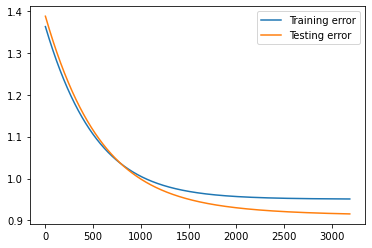

Model number  2 :


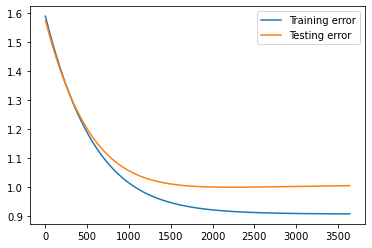

Model number  3 :


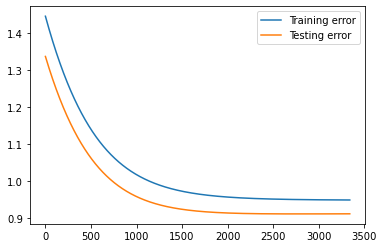

Model number  4 :


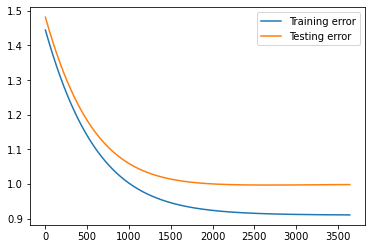

Model number  5 :


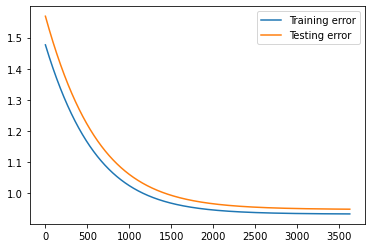

Model number  6 :


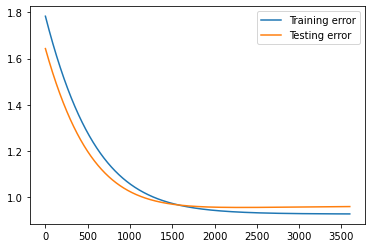

Model number  7 :


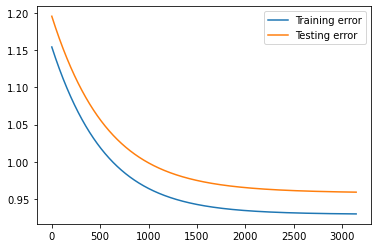

Model number  8 :


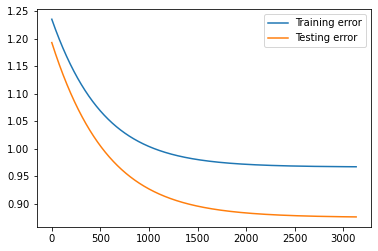

Model number  9 :


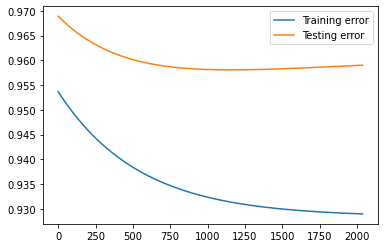

Model number  10 :


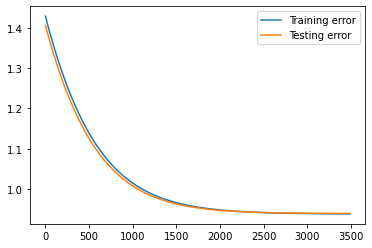

Model number  11 :


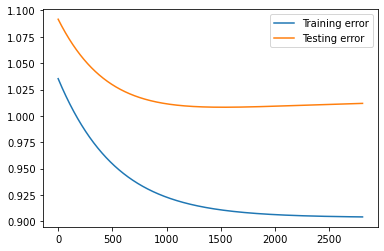

Model number  12 :


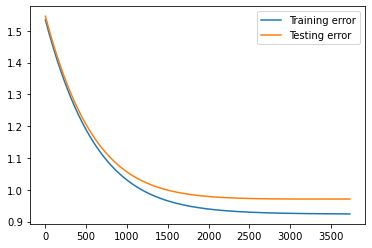

Model number  13 :


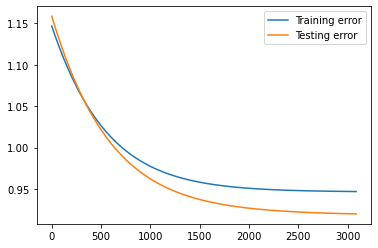

Model number  14 :


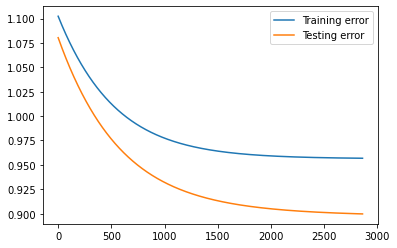

Model number  15 :


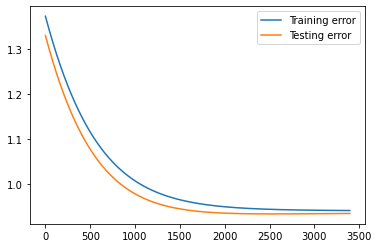

Model number  16 :


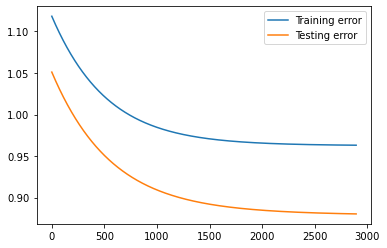

Model number  17 :


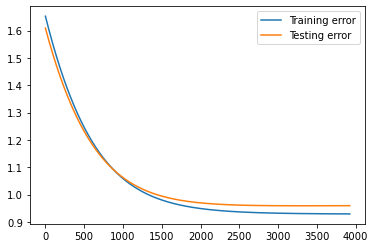

Model number  18 :


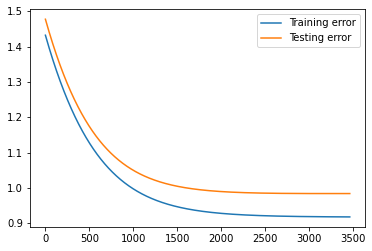

Model number  19 :


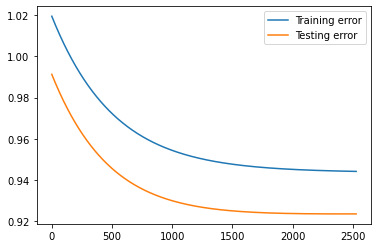

Model number  20 :


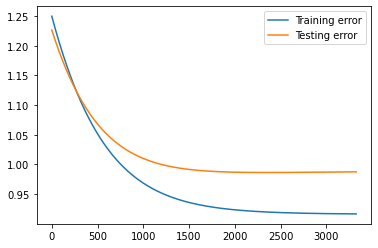

In [13]:
# Plotting training VS testing error for all 20 models for GD
for x in range(20):
    plt.figure()
    print("Model number ",x+1,":")
    plt.plot(past_rmse_train_grad_desc[x], label="Training error")
    plt.plot(past_rmse_test_grad_desc[x], label="Testing error")
    plt.legend()
    plt.show()

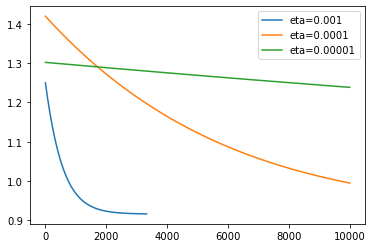

In [14]:
#Now using 20th model to compare effect of learning rate on GD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.0001
eta3=0.00001

final_theta2_gd, past_costs_train2, past_costs_test2, past_rmse_train_grad_desc2, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3_gd, past_costs_train3, past_costs_test3, past_rmse_train_grad_desc3, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)


plt.plot(past_rmse_train_grad_desc[19], label="eta=0.001")
plt.plot(past_rmse_train_grad_desc2, label="eta=0.0001")
plt.plot(past_rmse_train_grad_desc3, label="eta=0.00001")
plt.legend()


In [15]:
# STOCHASTIC GRADIENT DESCENT FUNCTION DEFINITION

def stoch_grad(x, y, iterations, eta, x_test, y_test, precis):
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        np.random.shuffle(x)
        mse = 0
        for j in range(x.shape[0]):
            row_j = np.matrix(x[j])
            prediction = np.matmul(row_j, theta)
            xT = row_j.transpose()
            diff = prediction - np.matrix(y[j])
            theta = theta - eta*np.matmul(xT, diff)
        
        diff_train = np.matmul(x, theta)-y
        cost_train = (1/(2*m))*(np.matmul(diff_train.T, diff_train))
        cost_train_val = np.array(cost_train)[0][0]
        past_costs_train.append(cost_train_val)
        past_rmse_train.append(np.sqrt(2*cost_train_val))
        
        diff_test = np.matmul(x_test,theta) - y_test
        mse_test = (1/(2*n))*(np.matmul(diff_test.T, diff_test))
        mse_test_val = np.array(mse_test)[0][0]
        past_costs_test.append(mse_test_val)
        past_rmse_test.append(np.sqrt(2*mse_test_val))
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test   

            

In [16]:
# STOCHASTIC GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_sgd = [None]*20
past_rmse_test_sgd = [None]*20
past_costs_train_sgd = [None]*20
past_costs_test_sgd = [None]*20
final_theta_sgd = [None]*20
precision = 0.000001
eta = 0.001
iterations = 200
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta_sgd[i], past_costs_train_sgd[i], past_costs_test_sgd[i], past_rmse_train_sgd[i], past_rmse_test_sgd[i] = stoch_grad(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    #printing error values for learning rate=0.01 , 20 models.
    training_sgd=[]
    training_sgd.append("Training")
    testing_sgd=[]
    testing_sgd.append("Testing")
    
    print ("Error values (every 50th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_sgd[i])): 
        if x%50==0:
            training_sgd.append(past_rmse_train_sgd[i][x]) 
            testing_sgd.append(past_rmse_test_sgd[i][x])
    
    for c1, c2 in zip(training_sgd, testing_sgd):
        print ("%-40s %s" % (c1, c2))         
    print("\n")


Error values (every 50th iteration) for model number 1 :-

Training                                 Testing
1.1548587873112377                       0.982742699041149
1.014833884291882                        0.959985514887104
1.0163771085968492                       0.9635520653893384
1.0163636070972217                       0.9644937960326104


Error values (every 50th iteration) for model number 2 :-

Training                                 Testing
1.0042073090594934                       1.0646125387471848
0.9636918013454856                       1.0820074757751625
0.9621999146817878                       1.059823272399301
0.963926025539324                        1.0855242355558379


Error values (every 50th iteration) for model number 3 :-

Training                                 Testing
1.0924982458334778                       0.9951822835634454
1.0071791367544698                       0.9571931965126117
1.0070958962087782                       0.971938048480596
1.00899194648949

In [17]:
#final theta after applying SGD
bias_sgd=[]
bias_sgd.append("Bias")
age_sgd=[]
age_sgd.append("Age")
bmi_sgd=[]
bmi_sgd.append("BMI")
children_sgd=[]
children_sgd.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING SGD:-")    
for x in range(20): 
            bias_sgd.append(final_theta_sgd[x][0]) 
            age_sgd.append(final_theta_sgd[x][1])
            bmi_sgd.append(final_theta_sgd[x][2]) 
            children_sgd.append(final_theta_sgd[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_sgd, age_sgd, bmi_sgd, children_sgd):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))    

FINAL THETA OF 20 MODELS AFTER APPLYING SGD:-
Bias                 Age                  BMI                  Children
[[0.01062008]]       [[0.04135914]]       [[-0.00949713]]      [[-0.01725899]]
[[-0.01543746]]      [[0.0223933]]        [[0.01690602]]       [[0.01902255]]
[[0.00102677]]       [[0.04525057]]       [[0.03096011]]       [[-0.02792122]]
[[-0.01698918]]      [[0.02073529]]       [[0.01283425]]       [[0.00969788]]
[[0.00262828]]       [[-0.02457346]]      [[0.00181367]]       [[0.02203205]]
[[-0.02981697]]      [[-0.00532252]]      [[-0.00361768]]      [[0.00430973]]
[[-0.01071785]]      [[0.03567708]]       [[-0.01151209]]      [[-0.00058621]]
[[0.04705225]]       [[-0.0219635]]       [[0.02051423]]       [[-0.01845386]]
[[0.00288676]]       [[0.03202002]]       [[-0.03694404]]      [[0.00967175]]
[[-0.00469327]]      [[-0.00683132]]      [[-0.00179614]]      [[0.02646744]]
[[-0.03283066]]      [[0.01583151]]       [[0.01216417]]       [[0.0048233]]
[[-0.03607545]]      

Model number  1 :


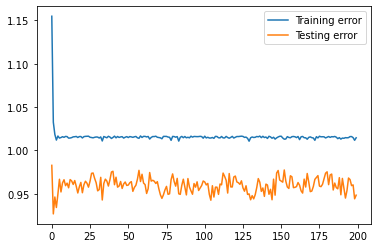

Model number  2 :


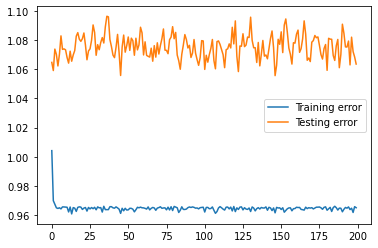

Model number  3 :


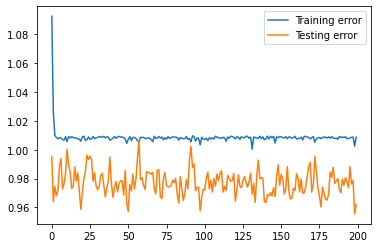

Model number  4 :


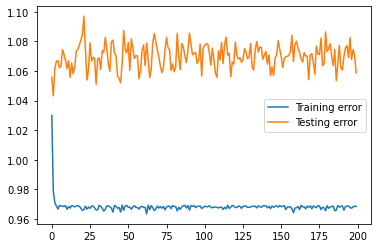

Model number  5 :


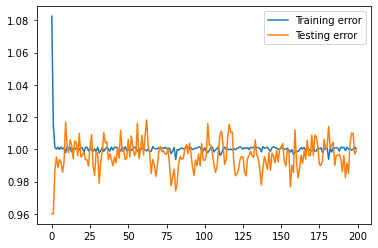

Model number  6 :


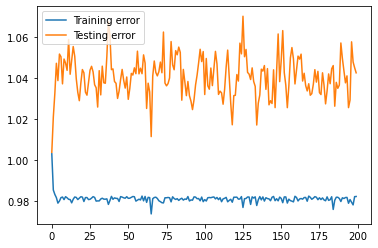

Model number  7 :


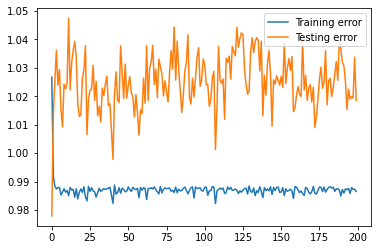

Model number  8 :


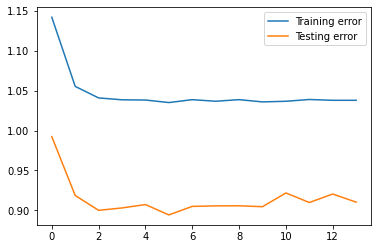

Model number  9 :


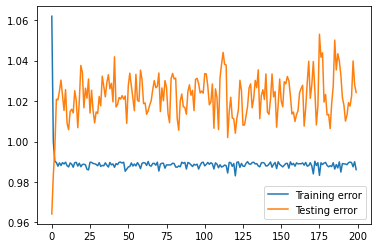

Model number  10 :


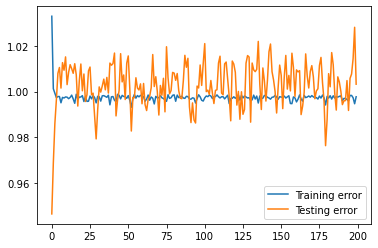

Model number  11 :


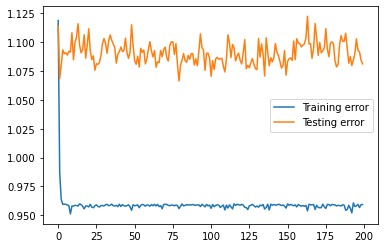

Model number  12 :


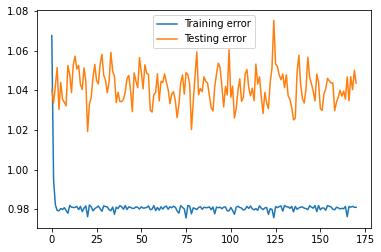

Model number  13 :


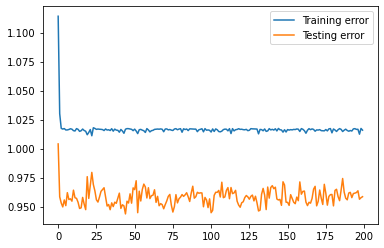

Model number  14 :


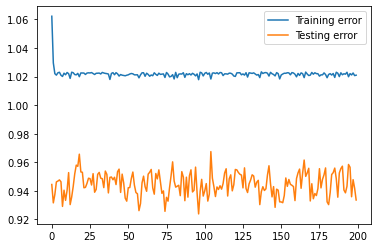

Model number  15 :


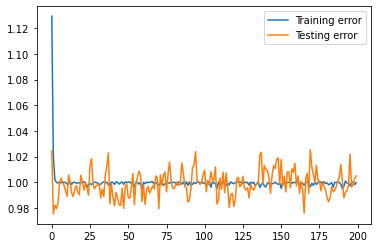

Model number  16 :


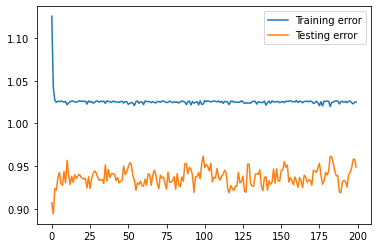

Model number  17 :


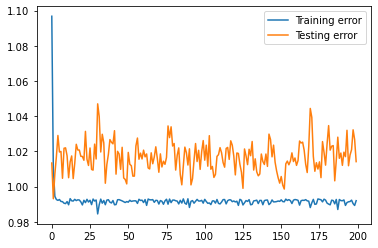

Model number  18 :


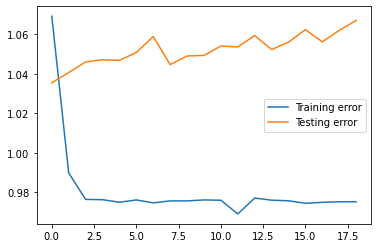

Model number  19 :


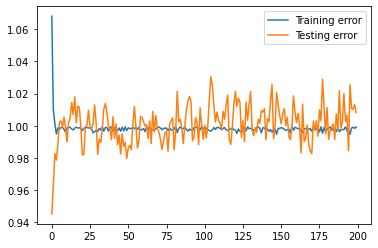

Model number  20 :


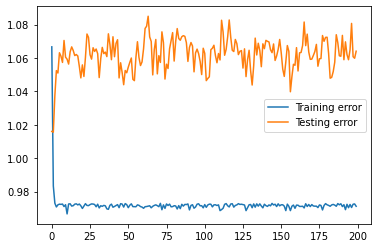

In [18]:
# Plotting training VS testing error for all 20 models for SGD
for x in range(20):
    
    plt.figure()
    print("Model number ",x+1,":")
    plt.plot(past_rmse_train_sgd[x], label="Training error")
    plt.plot(past_rmse_test_sgd[x], label="Testing error")
    plt.legend()
    plt.show()

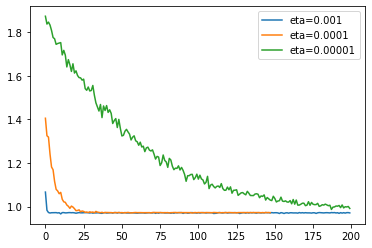

In [19]:
#Now using 20th model to compare effect of learning rate on SGD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.0001
eta3=0.00001

final_theta2, past_costs_train2, past_costs_test2, past_rmse_train_sgd2, past_rmse_test_sgd3 = stoch_grad(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs_train3, past_costs_test3, past_rmse_train_sgd3, past_rmse_test_sgd3 = stoch_grad(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.plot(past_rmse_train_sgd[19], label="eta=0.001")
plt.plot(past_rmse_train_sgd2, label="eta=0.0001")
plt.plot(past_rmse_train_sgd3, label="eta=0.00001")
plt.legend()

In [20]:
#Creating data frame to highlight min rmse across the models
min_rmse_train_table_gd=[None]*20
min_rmse_test_table_gd=[None]*20
min_rmse_train_table_sgd=[None]*20
min_rmse_test_table_sgd=[None]*20
for x in range(20):
    min_rmse_train_table_gd[x]=past_rmse_train_grad_desc[x][len(past_rmse_train_grad_desc[x])-1]
    min_rmse_test_table_gd[x]=past_rmse_test_grad_desc[x][len(past_rmse_test_grad_desc[x])-1]
    min_rmse_train_table_sgd[x]=past_rmse_train_sgd[x][len(past_rmse_train_sgd[x])-1]
    min_rmse_test_table_sgd[x]=past_rmse_test_sgd[x][len(past_rmse_test_sgd[x])-1]

df = pd.DataFrame(list(zip(training_err_norm , min_rmse_train_table_gd, min_rmse_train_table_sgd, testing_err_norm ,  min_rmse_test_table_gd, min_rmse_test_table_sgd)), 
     index =['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], columns =['NE train', 'GD train' , 'SGD train' , 'NE test', 'GD test' , 'SGD test']) 
df

,NE train,GD train,SGD train,NE test,GD test,SGD test
1,0.950736,0.951226,1.014545,0.911239,0.915563,0.948323
2,0.906864,0.907439,0.965129,1.009387,1.005055,1.063489
3,0.948694,0.949202,1.008677,0.913036,0.911894,0.961957
4,0.910216,0.910783,0.968331,1.000836,0.998399,1.058719
5,0.933557,0.934109,1.000284,0.948106,0.949232,0.999152
6,0.927714,0.928217,0.982325,0.962917,0.959984,1.042727
7,0.929465,0.930027,0.986552,0.957824,0.959256,1.018507
8,0.966398,0.966927,1.037794,0.874944,0.875709,0.910453
9,0.928381,0.928965,0.986103,0.961223,0.959013,1.024228
10,0.937269,0.937803,0.997697,0.938961,0.938922,1.003190


In [21]:
#Trying to compare the algorithms
wins_NE_train=0
wins_GD_train=0
wins_SGD_train=0
wins_NE_test=0
wins_GD_test=0
wins_SGD_test=0
for x in range(20):
    if(training_err_norm[x]<min(min_rmse_train_table_gd[x],min_rmse_train_table_sgd[x])):
        wins_NE_train+=1
    elif(min_rmse_train_table_gd[x]<min(training_err_norm[x],min_rmse_train_table_sgd[x])):
        wins_GD_train+=1
    else:
        wins_SGD_train+=1
            
    if(testing_err_norm[x]<min(min_rmse_test_table_gd[x],min_rmse_test_table_sgd[x])):
        wins_NE_test+=1
            
    elif(min_rmse_test_table_gd[x]<min(testing_err_norm[x],min_rmse_test_table_sgd[x])):
        wins_GD_test+=1
    else:
        wins_SGD_test+=1        

wins = {'Number of training minimums ':[wins_NE_train, wins_GD_train, wins_SGD_train], 'Number of testing minimums':[wins_NE_test, wins_GD_test, wins_SGD_test]}
df = pd.DataFrame(wins,index=['NE','GD','SGD'])
df

,Number of training minimums,Number of testing minimums
NE,20,7
GD,0,13
SGD,0,0


In [22]:
#Printing the training mean and variance as well as the testing mean and variance across the 3 algorithms
mean_NE_train=statistics.mean(training_err_norm)
variance_NE_train=statistics.variance(training_err_norm)
mean_GD_train=statistics.mean(min_rmse_train_table_gd)
variance_GD_train=statistics.variance(min_rmse_train_table_gd)
mean_SGD_train=statistics.mean(min_rmse_train_table_sgd)
variance_SGD_train=statistics.variance(min_rmse_train_table_sgd)

mean_NE_test=statistics.mean(testing_err_norm)
variance_NE_test=statistics.variance(testing_err_norm)
mean_GD_test=statistics.mean(min_rmse_test_table_gd)
variance_GD_test=statistics.variance(min_rmse_test_table_gd)
mean_SGD_test=statistics.mean(min_rmse_test_table_sgd)
variance_SGD_test=statistics.variance(min_rmse_test_table_sgd)

error_stats = {'Training mean error':[mean_NE_train, mean_GD_train, mean_SGD_train], 'Testing mean error':[mean_NE_test, mean_GD_test, mean_SGD_test]}
df = pd.DataFrame(error_stats,index=['NE','GD','SGD'])
display(df) 

error_stats = {'Training variance error':[variance_NE_train, variance_GD_train, variance_SGD_train], 'Testing variance error':[variance_NE_test, variance_GD_test, variance_SGD_test]}
df = pd.DataFrame(error_stats,index=['NE','GD','SGD'])
display(df) 

,Training mean error,Testing mean error
NE,0.933849,0.947726
GD,0.934394,0.947196
SGD,0.994385,1.007761


,Training variance error,Testing variance error
NE,0.000326,0.001703
GD,0.000326,0.001574
SGD,0.000466,0.002491
